### Python import

In [1]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

In [2]:
def one_hot_encoder(x):
    y = np.zeros((len(x), len(np.unique(x))))
    for i, num in enumerate(x):
        y[i][num] = 1
    return y

### Load Data

In [3]:
# Data source: http://yann.lecun.com/exdb/mnist/
train_image = idx2numpy.convert_from_file('data/train-images.idx3-ubyte')
train_label = idx2numpy.convert_from_file('data/train-labels.idx1-ubyte')
test_image = idx2numpy.convert_from_file('data/t10k-images.idx3-ubyte')
test_label = idx2numpy.convert_from_file('data/t10k-labels.idx1-ubyte')

### Pre-processing

In [4]:
x_train = train_image.reshape(-1, 28*28)
x_train = x_train / 255
y_train = one_hot_encoder(train_label)

### Model

In [5]:
def create_dnn_model():
    inputs = tf.keras.layers.Input(shape=(784))
    x = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=x)    
    return model

In [6]:
model = create_dnn_model()
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Training

In [7]:
errors = []
for x, y in tqdm(zip(x_train.reshape(-1, 1, 784), y_train.reshape(-1, 1, 10))):
    error = 5*model.train_on_batch(x, y)
    errors.append(error)   

60000it [02:52, 348.31it/s]


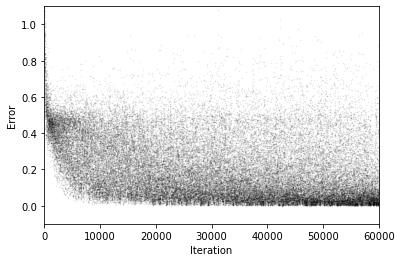

In [8]:
plt.scatter(list(range(0, 60000)), errors, s=0.2, alpha=0.1, color='k')
plt.xlim(0, 60000)
plt.ylim(-0.1, 1.1)
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

### Model test

In [9]:
x_test = test_image.reshape(-1, 28*28)
x_test = x_test / 255

In [10]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

In [11]:
accuracy = np.mean(pred == test_label)

In [12]:
print('Accuracy = %.2f %%'%(accuracy*100))

Accuracy = 86.86 %
